In [1]:
import numpy as np

import matplotlib.pyplot as plt   
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
plt.rcParams.update({"axes.grid" : True, "grid.color": "black", "grid.alpha":"0.25", "grid.linestyle": "--"})
plt.rcParams.update({'font.size': 14})

path = "exports/partial/
export = False

In [64]:

# Define constants
PT = 1.0
PNT = 1
epsilon = 0.18 
gamma = 0.29 
nu = 0.475 
e = np.linspace(0.01, 2.0, 100)
# Plotting expenditure shares
c = {'T': 'r', 'NT': 'b'}


# Define your functions
def calc_CT(e, PT=1, PNT=1, nu=nu, epsilon=epsilon, gamma=gamma):
    CT = (e/PT)*(nu*(PNT/e)**epsilon*(PT/PNT)**gamma)
    return CT

def calc_CNT(e, PT=1, PNT=1, nu=nu, epsilon=epsilon, gamma=gamma):
    CNT = (e/PNT)*(1-nu*(PNT/e)**epsilon*(PT/PNT)**gamma)
    return CNT

def share_T(e, PT=1, PNT=1, nu=nu, epsilon=epsilon, gamma=gamma):
    CT = (e/PT)*(nu*(PNT/e)**epsilon*(PT/PNT)**gamma)
    CNT = (e/PNT)*(1-nu*(PNT/e)**epsilon*(PT/PNT)**gamma)  
    return CT/(CT+CNT) 


def exp_shareT(e, PT=1, PNT=1, nu=nu, epsilon=epsilon, gamma=gamma):
    omega_T = nu *(PNT/e)**epsilon*(PT/PNT)**gamma
    return omega_T

def exp_shareNT(e, PT=1, PNT=1, nu=nu, epsilon=epsilon, gamma=gamma):
    omega_NT = 1-nu *(PNT/e)**epsilon*(PT/PNT)**gamma
    return omega_NT

def utility_indirect(e, PT=1, PNT=1, nu=nu, epsilon=epsilon, gamma=gamma):
    utility = (1/epsilon) * ( (e/PNT)**epsilon -1) - (nu/gamma)*( (PT/PNT)**gamma -1)
    return utility

def mu_e(e, PT=1, PNT=1, nu=nu, epsilon=epsilon, gamma=gamma):
    mu_e = PNT**(-epsilon) * e**(- (1-epsilon))
    return mu_e
    
# manualy calculating mu_e to check if it is correct
def mu_e_manual(e, PT=1, PNT=1, nu=nu, epsilon=epsilon, gamma=gamma):
    utility = utility_indirect(e, PT, PNT, nu, epsilon, gamma)
    utility_plus_1 = utility_indirect(e*1.01, PT, PNT, nu, epsilon, gamma)
    mu_e = (utility_plus_1 - utility) / (0.01*e)
    return mu_e

def calc_IPP(omega_NT, omega_T, PT, PNT):
    IPP = omega_NT*PNT + omega_T*PT
    return IPP


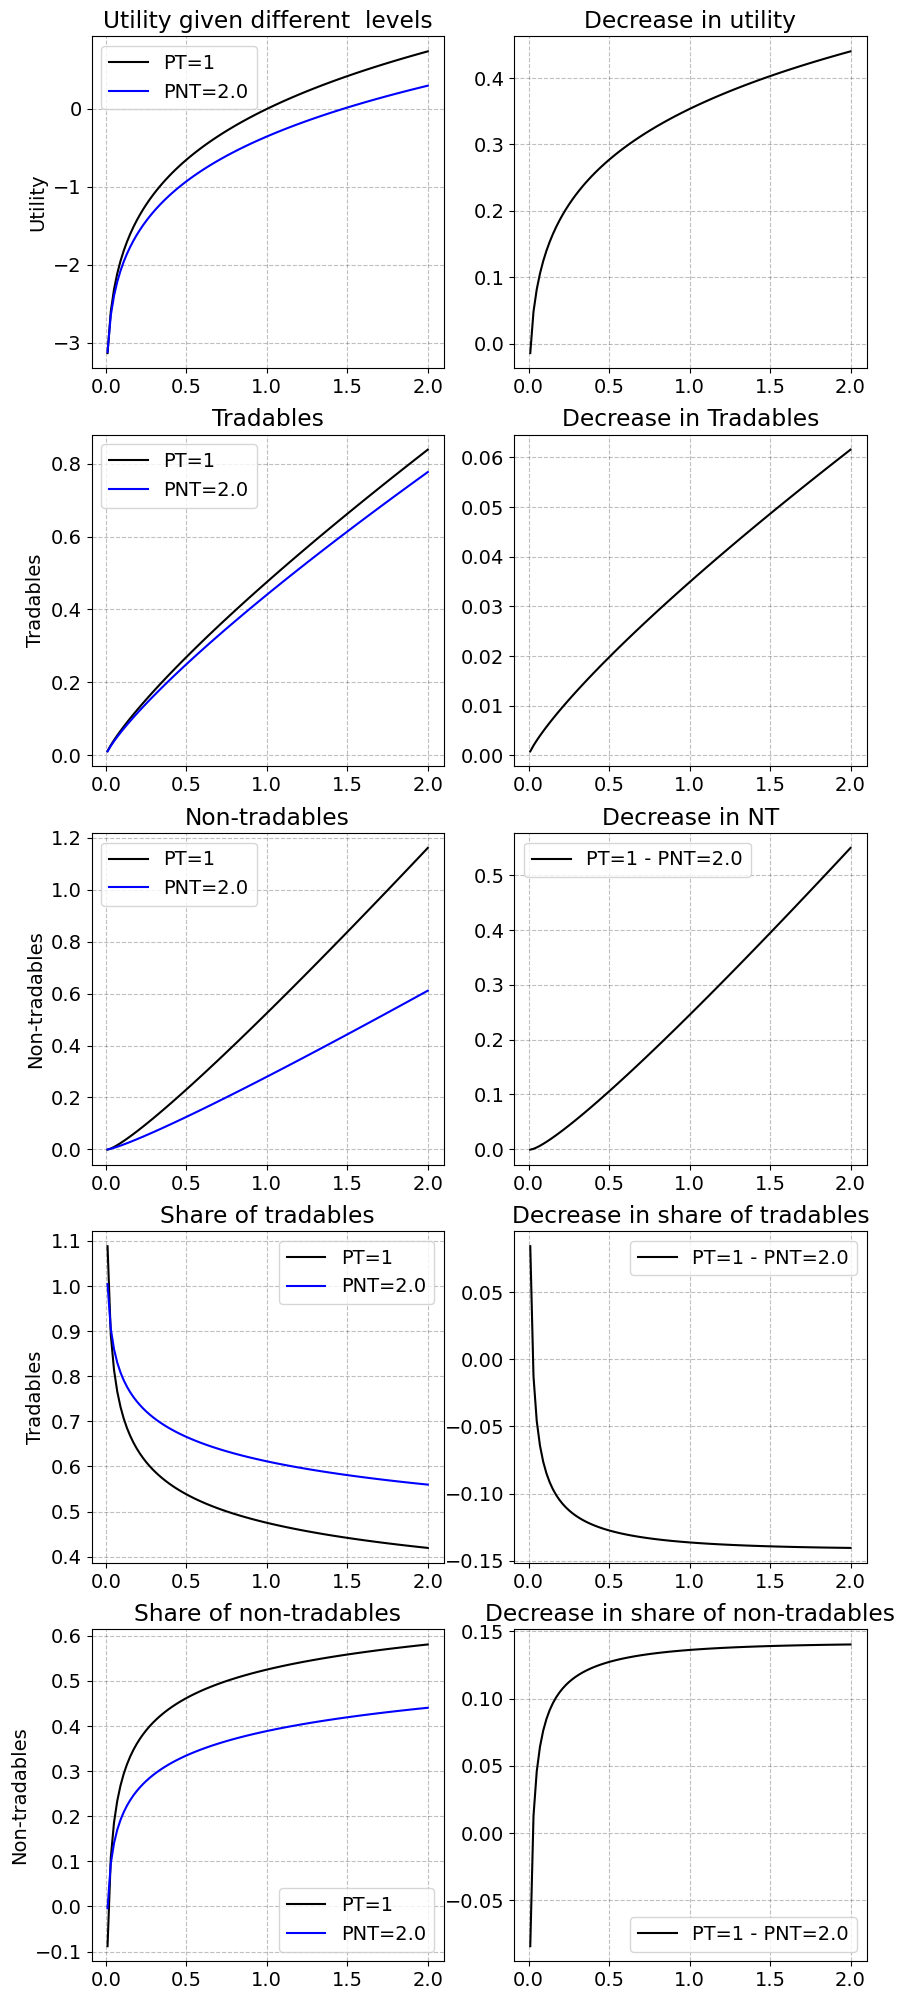

In [66]:
# Utility function

nrow = 5
ncol = 2
fig = plt.figure(figsize=(10, 5*nrow))
ax = fig.add_subplot(nrow, ncol, 1)
ax.set_title('Utility given different  levels')
ax.set_xlabel('')
ax.set_ylabel('Utility')


ax.plot(e, utility_indirect(e, nu=nu), label='PT=1', color='black')
ax.plot(e, utility_indirect(e, PNT=2.0, nu=nu), label='PNT=2.0', color='blue')

# Differentiate between the two lines
drop = utility_indirect(e) - utility_indirect(e, PNT=2.0) 
ax.legend()

ax = fig.add_subplot(nrow, ncol, 2)
ax.set_title('Decrease in utility')
ax.set_xlabel('')
ax.set_ylabel('')
ax.plot(e, drop, label='PT=1 - PNT=2.0', color='black')

# Tradables
ax = fig.add_subplot(nrow, ncol, 3)
ax.set_title('Tradables')
ax.set_xlabel('')
ax.set_ylabel('Tradables')
ax.plot(e, calc_CT(e), label='PT=1', color='black')
ax.plot(e, calc_CT(e, PNT=2.0), label='PNT=2.0', color='blue')
ax.legend()

# Differentiate between the two lines
drop = calc_CT(e) - calc_CT(e, PNT=2.0)
ax = fig.add_subplot(nrow, ncol, 4)
ax.set_title('Decrease in Tradables')
ax.set_xlabel('')
ax.plot(e, drop, label='PT=1 - PNT=2.0', color='black')


# Non-tradables
ax = fig.add_subplot(nrow, ncol, 5)
ax.set_title('Non-tradables')
ax.set_xlabel('')
ax.set_ylabel('Non-tradables')
ax.plot(e, calc_CNT(e), label='PT=1', color='black')
ax.plot(e, calc_CNT(e, PNT=2.0), label='PNT=2.0', color='blue')
ax.legend()

# Differentiate between the two lines
drop = calc_CNT(e) - calc_CNT(e, PNT=2.0)
ax = fig.add_subplot(nrow, ncol, 6)
ax.set_title('Decrease in NT')
ax.set_xlabel('')
ax.plot(e, drop, label='PT=1 - PNT=2.0', color='black')
ax.legend()


# Shar of tradables

ax = fig.add_subplot(nrow, ncol, 7)
ax.set_title('Share of tradables')
ax.set_xlabel('')
ax.set_ylabel('Tradables')
ax.plot(e, share_T(e), label='PT=1', color='black')
ax.plot(e, share_T(e, PNT=2.0), label='PNT=2.0', color='blue')
ax.legend()

# Differentiate between the two lines
drop = share_T(e) - share_T(e, PNT=2.0)
ax = fig.add_subplot(nrow, ncol, 8)
ax.set_title('Decrease in share of tradables')
ax.set_xlabel('')
ax.plot(e, drop, label='PT=1 - PNT=2.0', color='black')
ax.legend()


# Share on non-tradables
ax = fig.add_subplot(nrow, ncol, 9)
ax.set_title('Share of non-tradables')
ax.set_xlabel('')
ax.set_ylabel('Non-tradables')
ax.plot(e, 1-share_T(e), label='PT=1', color='black') 
ax.plot(e, 1-share_T(e, PNT=2.0), label='PNT=2.0', color='blue')
ax.legend()

# Differentiate between the two lines
drop = (1-share_T(e)) - (1-share_T(e, PNT=2.0))
ax = fig.add_subplot(nrow, ncol, 10)
ax.set_title('Decrease in share of non-tradables')
ax.set_xlabel('')
ax.plot(e, drop, label='PT=1 - PNT=2.0', color='black')
ax.legend()


[-1.95, -0.29500000000000004, -0.21593406593406594]
-0.21593406593406594


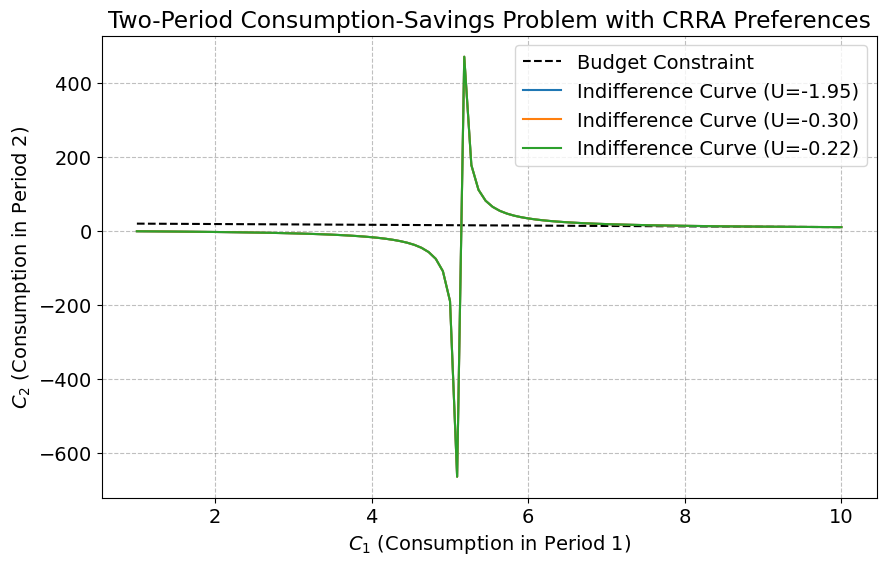

In [94]:
# Indiference curves 
# Parameters for the utility and budget constraint
gamma = 2       # Risk aversion coefficient
beta = 0.95     # Discount factor
Y1 = 10         # Income in period 1
Y2 = 10         # Income in period 2
r = 0.05        # Interest rate


# Utility function for CRRA preferences
def utility(C1, C2, gamma=gamma, beta=beta):
    return (C1**(1 - gamma)) / (1 - gamma) + beta * (C2**(1 - gamma)) / (1 - gamma)


# Budget constraint: calculates C2 for given C1
def budget_constraint(C1, Y1=Y1, Y2=Y2, r=r):
    return (1 + r) * (Y1 - C1) + Y2




def indifference_curve(C1, U_level, gamma=gamma, beta=beta):
    return ((U_level*(1-gamma)- C1**(1-gamma))/beta)**(1/(1-gamma))




# Set up the figure
plt.figure(figsize=(10, 6))


# Values for C1
C1_values = np.linspace(1, Y1, 100)


# plt.plot(C1_values, utility(C1_values, 1), label='Budget Constraint', color='black', linestyle='--')


# Plot Budget Constraint
C2_budget = budget_constraint(C1_values)

plt.plot(C1_values, C2_budget, label='Budget Constraint', color='black', linestyle='--')

# Plot Indifference Curves for different utility levels

utility_levels = [utility(1, 1), utility(5, 10), utility(7, 13)]  # Different utility levels for indifference curves

print(utility_levels)
# plt.plot(C1_values,indifference_curve(C1_values, 3.0), label='Indifference Curve (U=3.7)', color='red')


u = utility(Y1, Y2)
print(U)
for U in utility_levels:
    C2_indiff = indifference_curve(C1_values, u)
    plt.plot(C1_values, C2_indiff, label=f'Indifference Curve (U={U:.2f})')

# Labels and title
plt.xlabel('$C_1$ (Consumption in Period 1)')
plt.ylabel('$C_2$ (Consumption in Period 2)')
plt.title('Two-Period Consumption-Savings Problem with CRRA Preferences')

# Formatting
# plt.ylim(0, 20)
# plt.xlim(0, 12)
plt.legend()
plt.grid(True)

# Show plot
plt.show()



# Stop

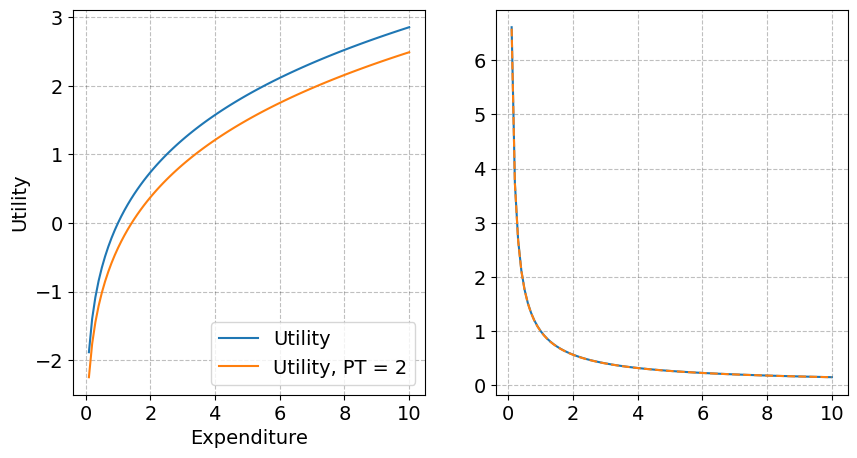

In [14]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))  # One figure with 3 subplots in one row

# ploting utility 

utility_indirect(e, PT, PNT, nu, epsilon, gamma) - (nu/gamma)*( (PT/PNT)**gamma -1)


u_s = utility_indirect(e, PT, PNT, nu, epsilon, gamma) - (nu/gamma)*( (2/PNT)**gamma -1)

axs[0].plot(e, utility_indirect(e, PT, PNT, nu, epsilon, gamma), label="Utility")
axs[0].plot(e, utility_indirect(e, 2, PNT, nu, epsilon, gamma), label="Utility, PT = 2")
# axs[0].plot(e, u_s, label="Utility, PT = 1", linestyle="--")
axs[0].legend()
axs[0].set_xlabel("Expenditure")
axs[0].set_ylabel("Utility")


# Plotting MU 
axs[1].plot(e, mu_e(e, PT, PNT, nu, epsilon, gamma), label="Marginal Utility")
axs[1].plot(e, mu_e_manual(e, PT, PNT, nu, epsilon, gamma), label="Marginal Utility", linestyle="--")

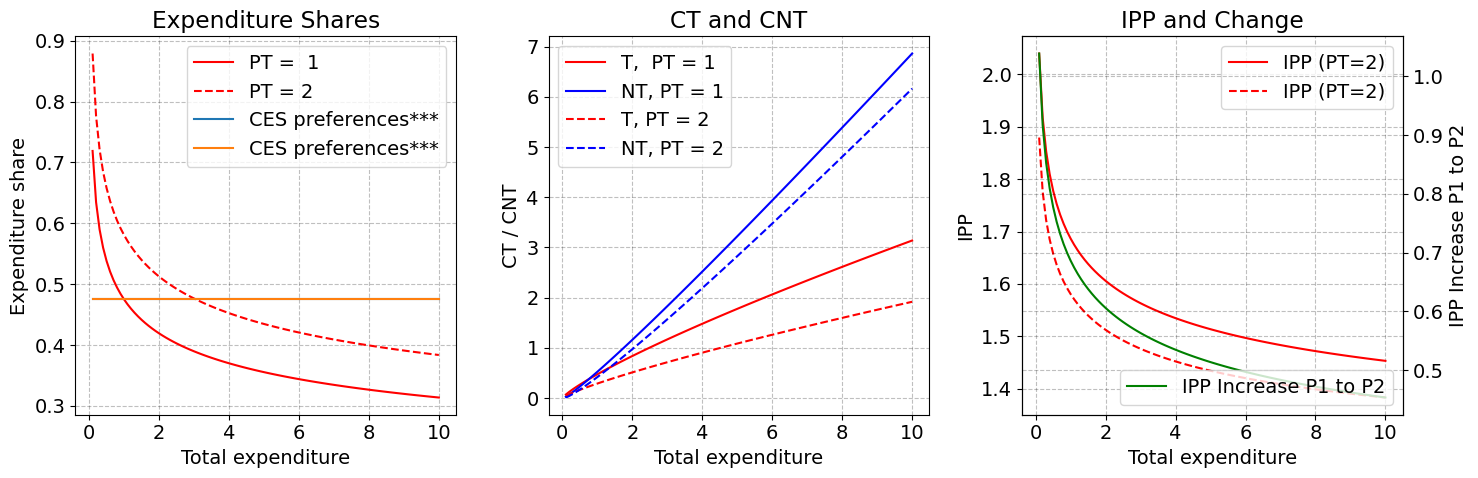

In [24]:

# Define constants
PT = 1.0
PNT = 1
epsilon = 0.18 
gamma = 0.29 
nu = 0.475 
e = np.linspace(0.1, 10, 100)

# Plotting expenditure shares
c = {'T': 'r', 'NT': 'b'}
fig, axs = plt.subplots(1, 3, figsize=(15, 5))  # One figure with 3 subplots in one row

# First subplot for expenditure shares
axs[0].plot(e, exp_shareT(e, 1, PNT, nu, epsilon, gamma), color=c['T'], label="PT =  1")
axs[0].plot(e, exp_shareT(e, 2, PNT, nu, epsilon, gamma), color=c['T'], linestyle='--', label="PT = 2")
axs[0].plot(e, exp_shareT(e, 1, PNT, nu, 0, 0), label="CES preferences***")
# axs[0].plot(e, exp_shareT(e, 2, PNT, nu, 0, 0), label="CES preferences***")
axs[0].legend(loc='upper right')
axs[0].set_xlabel('Total expenditure')
axs[0].set_ylabel('Expenditure share')
axs[0].set_title('Expenditure Shares')

# Second subplot for CT and CNT
axs[1].plot(e, calc_CT(e, PT, PNT, nu, epsilon, gamma), label="T,  PT = 1", color=c['T'])
axs[1].plot(e, calc_CNT(e, PT, PNT, nu, epsilon, gamma), label="NT, PT = 1", color=c['NT'])
axs[1].plot(e, calc_CT(e, 2, PNT, nu, epsilon, gamma), label="T, PT = 2", linestyle='--', color=c['T'])
axs[1].plot(e, calc_CNT(e, 2, PNT, nu, epsilon, gamma), label="NT, PT = 2", linestyle='--', color=c['NT'])
axs[1].legend()
axs[1].set_xlabel('Total expenditure')
axs[1].set_ylabel('CT / CNT')
axs[1].set_title('CT and CNT')

# Third subplot for IPP and change
ax3 = axs[2]
ax3.plot(e, calc_IPP(exp_shareNT(e, 1, PNT, nu, epsilon, gamma), exp_shareT(e, 2, PT, nu, epsilon, gamma), 2, PNT), label="IPP (PT=2)", color=c['T'])
ax3.plot(e, calc_IPP(exp_shareNT(e, 2, PNT, nu, epsilon, gamma), exp_shareT(e, 2, PT, nu, epsilon, gamma), 2, PNT), label="IPP (PT=2)", linestyle='--', color=c['T'])

ax4 = ax3.twinx()  # Second y-axis for change
IPP_PT1 = calc_IPP(exp_shareNT(e, 1, PNT, nu, epsilon, gamma), exp_shareT(e, 1, PT, nu, epsilon, gamma), 1, PNT)
IPP_PT2 = calc_IPP(exp_shareNT(e, 1, PNT, nu, epsilon, gamma), exp_shareT(e, 2, PT, nu, epsilon, gamma), 2, PNT)

change = IPP_PT2 - IPP_PT1
ax4.plot(e, change, color='green', label="IPP Increase P1 to P2")

ax3.set_xlabel('Total expenditure')
ax3.set_ylabel('IPP')
ax4.set_ylabel('IPP Increase P1 to P2')
ax3.legend(loc='upper right')
ax4.legend(loc='lower right')
axs[2].set_title('IPP and Change')

plt.tight_layout()


if export:
    plt.savefig(path + "consumption.png")


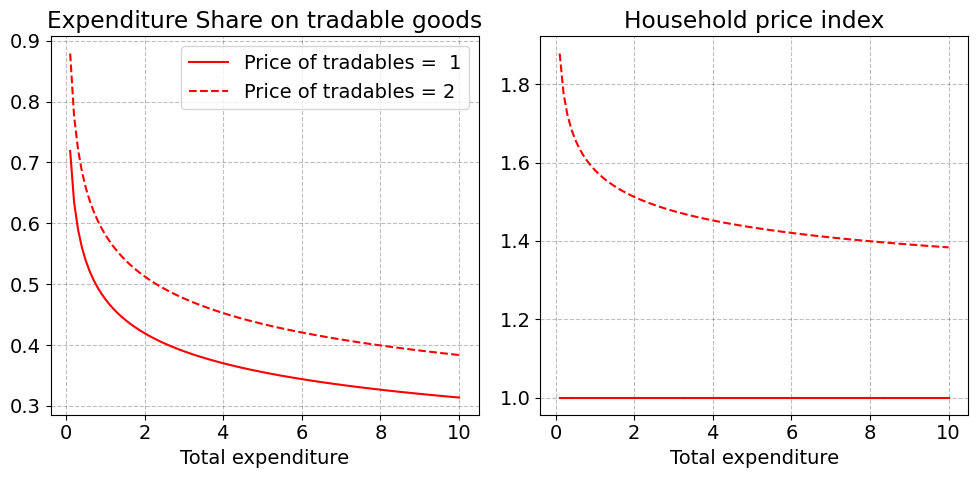

In [7]:
import matplotlib.pyplot as plt
import numpy as np

# Define your functions
def calc_CT(e, PT, PNT, nu, epsilon, gamma):
    CT = (e/PT)*(nu*(PNT/e)**epsilon*(PT/PNT)**gamma)
    return CT

def calc_CNT(e, PT, PNT, nu, epsilon, gamma):
    CNT = (e/PNT)*(1-nu*(PNT/e)**epsilon*(PT/PNT)**gamma)
    return CNT

def exp_shareT(e, PT, PNT, nu, epsilon, gamma):
    omega_T = nu *(PNT/e)**epsilon*(PT/PNT)**gamma
    return omega_T

def exp_shareNT(e, PT, PNT, nu, epsilon, gamma):
    omega_NT = 1-nu *(PNT/e)**epsilon*(PT/PNT)**gamma
    return omega_NT

def utility_indirect(e, PT, PNT, nu, epsilon, gamma):
    utility = (1/epsilon) * ( (e/PNT)**epsilon -1) - (nu/gamma)*( (PT/PNT)**gamma -1)
    return utility

def calc_IPP(omega_NT, omega_T, PT, PNT):
    IPP = omega_NT*PNT + omega_T*PT
    return IPP

# Define constants
PT = 1.0
PNT = 1.0
epsilon = 0.18 
gamma = 0.29 
nu = 0.475 
e = np.linspace(0.1, 10, 100)

# Plotting expenditure shares
c = {'T': 'r', 'NT': 'b'}
fig, axs = plt.subplots(1, 2, figsize=(10, 5))  # One figure with 3 subplots in one row

# First subplot for expenditure shares
axs[0].plot(e, exp_shareT(e, 1, PNT, nu, epsilon, gamma), color=c['T'], label="Price of tradables =  1")
axs[0].plot(e, exp_shareT(e, 2, PNT, nu, epsilon, gamma), color=c['T'], linestyle='--', label="Price of tradables = 2")

#Legend under the plot
axs[0].legend( loc = 'upper right')


axs[0].set_xlabel('Total expenditure')

axs[0].set_title('Expenditure Share on tradable goods')


# Second subplot for CT and CNT
axs[1].plot(e, calc_IPP(exp_shareNT(e, 1, PNT, nu, epsilon, gamma), exp_shareT(e, 1, PT, nu, epsilon, gamma), 1, PNT), label="IPP (PT=2)", color=c['T'])
axs[1].plot(e, calc_IPP(exp_shareNT(e, 2, PNT, nu, epsilon, gamma), exp_shareT(e, 2, PT, nu, epsilon, gamma), 2, PNT), label="IPP (PT=2)", linestyle='--', color=c['T'])
# axs[1].legend()
axs[1].set_title('Household price index')
axs[1].set_xlabel('Total expenditure')

# # Third subplot for IPP and change
# ax3 = axs[2]
# # ax3.plot(e, calc_IPP(exp_shareNT(e, 1, PNT, nu, epsilon, gamma), exp_shareT(e, 2, PT, nu, epsilon, gamma), 2, PNT), label="IPP (PT=2)", color=c['T'])
# # ax3.plot(e, calc_IPP(exp_shareNT(e, 2, PNT, nu, epsilon, gamma), exp_shareT(e, 2, PT, nu, epsilon, gamma), 2, PNT), label="IPP (PT=2)", linestyle='--', color=c['T'])

# ax4 = ax3.twinx()  # Second y-axis for change
# IPP_PT1 = calc_IPP(exp_shareNT(e, 1, PNT, nu, epsilon, gamma), exp_shareT(e, 1, PT, nu, epsilon, gamma), 1, PNT)
# IPP_PT2 = calc_IPP(exp_shareNT(e, 1, PNT, nu, epsilon, gamma), exp_shareT(e, 2, PT, nu, epsilon, gamma), 2, PNT)

# change = IPP_PT2 - IPP_PT1
# ax3.plot(e, change, color='green', label="IPP Increase P1 to P2")

# ax3.set_xlabel('Total expenditure')
# ax3.set_ylabel('IPP')
# ax4.set_ylabel('IPP Increase P1 to P2')
# ax3.legend(loc='upper right')
# ax4.legend(loc='lower right')
# axs[2].set_title('IPP and Change')

plt.tight_layout()
if export:
    plt.savefig(path + "Preferences.png")


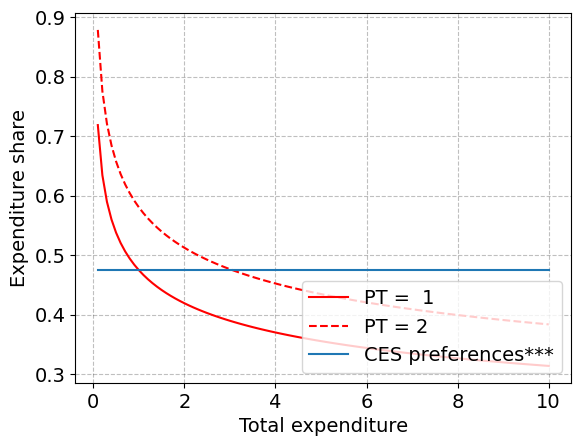

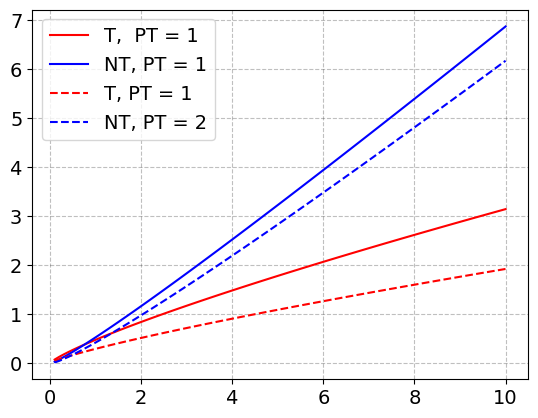

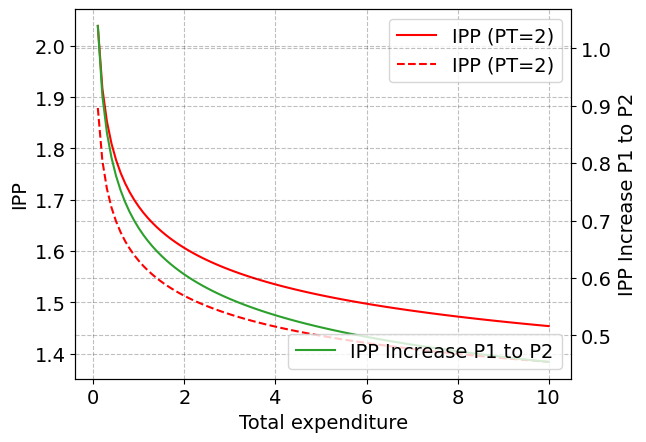

In [8]:

def calc_CT(e, PT, PNT, nu, epsilon, gamma):
    CNT = (e/PT)*(nu*(PNT/e)**epsilon*(PT/PNT)**gamma)

    return CNT

def calc_CNT(e, PT, PNT, nu, epsilon, gamma):
    CNT = (e/PNT)*(1-nu*(PNT/e)**epsilon*(PT/PNT)**gamma)

    return CNT

def exp_shareT(e, PT, PNT, nu, epsilon, gamma):
    omega_T = nu *(PNT/e)**epsilon*(PT/PNT)**gamma

    return omega_T

def exp_shareNT(e, PT, PNT, nu, epsilon, gamma):
    omega_NT = 1-nu *(PNT/e)**epsilon*(PT/PNT)**gamma

    return omega_NT

def utility_indirect(e, PT, PNT, nu, epsilon, gamma):
    utility = (1/epsilon) * ( (e/PNT)**epsilon -1) - (nu/gamma)*( (PT/PNT)**gamma -1)

    return utility

def calc_IPP(omega_NT, omega_T, PT, PNT):
    IPP = omega_NT*PNT + omega_T*PT

    return IPP


PT = 1.0
PNT = 1
epsilon = 0.18 
gamma = 0.29 
nu = 0.475 

e = np.linspace(0.1, 10, 100)
omega_T = exp_shareT(e, PT, PNT, nu, epsilon, gamma)
omega_NT = exp_shareNT(e, PT, PNT, nu, epsilon, gamma)
utility = utility_indirect(e, PT, PNT, nu, epsilon, gamma)

c= {'T': 'r', 'NT': 'b'}


# Plotting expenditure shares
fig, ax = plt.subplots()
ax.plot(e, exp_shareT(e, 1, PNT, nu, epsilon, gamma), color=c['T'], label = "PT =  1")
ax.plot(e, exp_shareT(e, 2, PNT, nu, epsilon, gamma), color=c['T'], linestyle = '--', label = "PT = 2")
ax.plot(e, exp_shareT(e, 1, PNT, nu, 0, 0),  label = "CES preferences***")
ax.legend(loc='lower right')
ax.set_xlabel('Total expenditure')
ax.set_ylabel('Expenditure share')


# Ploting utility on second y-axis
# ax2 = ax.twinx()
# ax2.plot(e, utility, color=colors[2], linestyle='--', label = "Utility")
# ax2.set_ylabel('Utility')

# Supplot with CT and CNT
fig, ax = plt.subplots()
ax.plot(e, calc_CT(e, PT, PNT, nu, epsilon, gamma), label = "T,  PT = 1", color=c['T'])
ax.plot(e, calc_CNT(e, PT, PNT, nu, epsilon, gamma), label = "NT, PT = 1", color=c['NT'])
ax.plot(e, calc_CT(e, 2, PNT, nu, epsilon, gamma), label = "T, PT = 1", linestyle='--', color=c['T'])
ax.plot(e, calc_CNT(e, 2, PNT, nu, epsilon, gamma), label = "NT, PT = 2", linestyle='--', color=c['NT'])


ax.legend()

 
#Ploting IPP
fig, ax = plt.subplots()

ax.plot(e, calc_IPP(exp_shareNT(e, 1, PNT, nu, epsilon, gamma), exp_shareT(e, 2, PT, nu, epsilon, gamma), 2, PNT), label = "IPP (PT=2)", color=c['T'])
ax.plot(e, calc_IPP(exp_shareNT(e, 2, PNT, nu, epsilon, gamma), exp_shareT(e, 2, PT, nu, epsilon, gamma), 2, PNT), label = "IPP (PT=2)", linestyle='--', color=c['T'])

# Ploting difference in IPP on the second y-axis
ax2 = ax.twinx()

IPP_PT1 = calc_IPP(exp_shareNT(e, 1, PNT, nu, epsilon, gamma), exp_shareT(e, 1, PT, nu, epsilon, gamma), 1, PNT)
IPP_TP2 = calc_IPP(exp_shareNT(e, 1, PNT, nu, epsilon, gamma), exp_shareT(e, 2, PT, nu, epsilon, gamma), 2, PNT)

change = IPP_TP2 - IPP_PT1
ax2.plot(e, change, color=colors[2], label = "IPP Increase P1 to P2")

ax2.legend(loc='lower right')
ax2.set_ylabel('IPP Increase P1 to P2')
ax.set_xlabel('Total expenditure')
ax.set_ylabel('IPP')
ax.legend()
plt.show()

TypeError: utility_indirect() missing 5 required positional arguments: 'PT', 'PNT', 'nu', 'epsilon', and 'gamma'

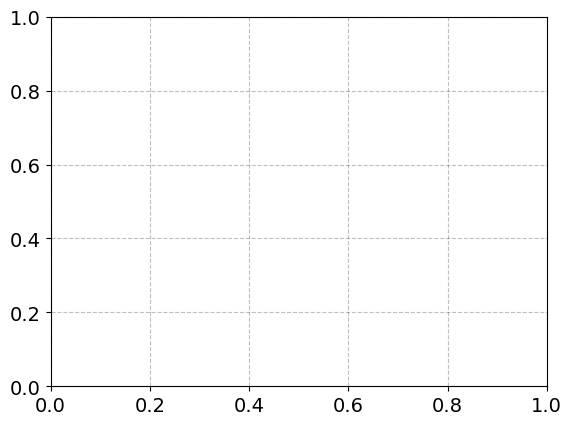

In [15]:
# Ploting the utility
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(e, utility_indirect(e), label = "Utility")
